## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

# 1. optimizers 改用SGD
# 2. epochs加到500

In [7]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [65]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 11ms/step - loss: 0.9353 - accuracy: 0.6777 - val_loss: 1.3913 - val_accuracy: 0.5211
Epoch 2/500
196/196 [==============================] - 2s 10ms/step - loss: 0.9382 - accuracy: 0.6749 - val_loss: 1.4231 - val_accuracy: 0.5127
Epoch 3/500
196/196 [==============================] - 2s 10ms/step - loss: 0.9216 - accuracy: 0.6803 - val_loss: 1.5646 - val_accuracy: 0.4827
Epoch 4/500
196/196 [==============================] - 2s 11ms/step - loss: 0.9215 - accuracy: 0.6806 - val_loss: 1.3253 - val_accuracy: 0.5431
Epoch 5/500
196/196 [==============================] - 2s 11ms/step - loss: 0.9241 - accuracy: 0.6782 - val_loss: 1.4102 - val_accuracy: 0.5317
Epoch 6/500
196/196 [==============================] - 2s 11ms/step - loss: 0.9061 - accuracy: 0.6861 - val_loss: 1.3678 - val_accuracy: 0.5290
Epoch 7/500
196/196 [==============================] - 2s 11ms/step - loss: 0.9067 - accuracy: 0.6862 - val_loss: 1.5600 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.6596 - accuracy: 0.7740 - val_loss: 1.6289 - val_accuracy: 0.5097
Epoch 58/500
196/196 [==============================] - 2s 11ms/step - loss: 0.6440 - accuracy: 0.7805 - val_loss: 1.7132 - val_accuracy: 0.5125
Epoch 59/500
196/196 [==============================] - 2s 12ms/step - loss: 0.6521 - accuracy: 0.7779 - val_loss: 1.4797 - val_accuracy: 0.5395
Epoch 60/500
196/196 [==============================] - 2s 12ms/step - loss: 0.6272 - accuracy: 0.7875 - val_loss: 1.5148 - val_accuracy: 0.5342
Epoch 61/500
196/196 [==============================] - 2s 12ms/step - loss: 0.6346 - accuracy: 0.7844 - val_loss: 1.6750 - val_accuracy: 0.4959
Epoch 62/500
196/196 [==============================] - 2s 12ms/step - loss: 0.6238 - accuracy: 0.7891 - val_loss: 1.6260 - val_accuracy: 0.5084
Epoch 63/500
196/196 [==============================] - 2s 12ms/step - loss: 0.6169 - accuracy: 0.7889 - val_loss: 1.7104 - val_accuracy: 0.496

196/196 [==============================] - 2s 12ms/step - loss: 0.3992 - accuracy: 0.8724 - val_loss: 1.8511 - val_accuracy: 0.5081
Epoch 114/500
196/196 [==============================] - 2s 12ms/step - loss: 0.3815 - accuracy: 0.8766 - val_loss: 1.7738 - val_accuracy: 0.5270
Epoch 115/500
196/196 [==============================] - 2s 12ms/step - loss: 0.3892 - accuracy: 0.8754 - val_loss: 2.1377 - val_accuracy: 0.4859
Epoch 116/500
196/196 [==============================] - 2s 12ms/step - loss: 0.3592 - accuracy: 0.8857 - val_loss: 1.7449 - val_accuracy: 0.5430
Epoch 117/500
196/196 [==============================] - 2s 12ms/step - loss: 0.3613 - accuracy: 0.8856 - val_loss: 1.8822 - val_accuracy: 0.5119
Epoch 118/500
196/196 [==============================] - 2s 11ms/step - loss: 0.3722 - accuracy: 0.8811 - val_loss: 1.7328 - val_accuracy: 0.5350
Epoch 119/500
196/196 [==============================] - 2s 11ms/step - loss: 0.3649 - accuracy: 0.8837 - val_loss: 1.9531 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.2390 - accuracy: 0.9311 - val_loss: 2.0311 - val_accuracy: 0.5403
Epoch 170/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1914 - accuracy: 0.9480 - val_loss: 2.2315 - val_accuracy: 0.5198
Epoch 171/500
196/196 [==============================] - 2s 12ms/step - loss: 0.1951 - accuracy: 0.9458 - val_loss: 2.3901 - val_accuracy: 0.5105
Epoch 172/500
196/196 [==============================] - 2s 12ms/step - loss: 0.2470 - accuracy: 0.9305 - val_loss: 2.1137 - val_accuracy: 0.5429
Epoch 173/500
196/196 [==============================] - 3s 13ms/step - loss: 0.1767 - accuracy: 0.9537 - val_loss: 2.1029 - val_accuracy: 0.5369
Epoch 174/500
196/196 [==============================] - 2s 12ms/step - loss: 0.1628 - accuracy: 0.9592 - val_loss: 2.1487 - val_accuracy: 0.5365
Epoch 175/500
196/196 [==============================] - 2s 11ms/step - loss: 0.1540 - accuracy: 0.9605 - val_loss: 2.3282 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.1186 - accuracy: 0.9760 - val_loss: 2.4611 - val_accuracy: 0.5403
Epoch 226/500
196/196 [==============================] - 2s 12ms/step - loss: 0.1074 - accuracy: 0.9768 - val_loss: 2.4076 - val_accuracy: 0.5413
Epoch 227/500
196/196 [==============================] - 2s 12ms/step - loss: 0.1881 - accuracy: 0.9599 - val_loss: 2.3989 - val_accuracy: 0.5462
Epoch 228/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0548 - accuracy: 0.9926 - val_loss: 2.4192 - val_accuracy: 0.5446
Epoch 229/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0494 - accuracy: 0.9940 - val_loss: 2.4880 - val_accuracy: 0.5342
Epoch 230/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0466 - accuracy: 0.9948 - val_loss: 2.4699 - val_accuracy: 0.5356
Epoch 231/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0466 - accuracy: 0.9947 - val_loss: 2.4527 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.0203 - accuracy: 0.9989 - val_loss: 2.7501 - val_accuracy: 0.5462
Epoch 282/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0201 - accuracy: 0.9988 - val_loss: 2.7287 - val_accuracy: 0.5427
Epoch 283/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0196 - accuracy: 0.9990 - val_loss: 2.7579 - val_accuracy: 0.5447
Epoch 284/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0194 - accuracy: 0.9991 - val_loss: 2.7447 - val_accuracy: 0.5452
Epoch 285/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0189 - accuracy: 0.9991 - val_loss: 2.7610 - val_accuracy: 0.5473
Epoch 286/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0186 - accuracy: 0.9992 - val_loss: 2.7637 - val_accuracy: 0.5449
Epoch 287/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0184 - accuracy: 0.9991 - val_loss: 2.7892 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.0107 - accuracy: 0.9998 - val_loss: 2.9739 - val_accuracy: 0.5437
Epoch 338/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0106 - accuracy: 0.9998 - val_loss: 2.9904 - val_accuracy: 0.5390
Epoch 339/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0104 - accuracy: 0.9998 - val_loss: 2.9788 - val_accuracy: 0.5444
Epoch 340/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0104 - accuracy: 0.9998 - val_loss: 2.9924 - val_accuracy: 0.5421
Epoch 341/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0103 - accuracy: 0.9998 - val_loss: 3.0247 - val_accuracy: 0.5434
Epoch 342/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0101 - accuracy: 0.9998 - val_loss: 3.0032 - val_accuracy: 0.5447
Epoch 343/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0099 - accuracy: 0.9999 - val_loss: 3.0170 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.2220 - val_accuracy: 0.5430
Epoch 394/500
196/196 [==============================] - 2s 11ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.1985 - val_accuracy: 0.5430
Epoch 395/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.2053 - val_accuracy: 0.5441
Epoch 396/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 3.2134 - val_accuracy: 0.5406
Epoch 397/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.2121 - val_accuracy: 0.5439
Epoch 398/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 3.2064 - val_accuracy: 0.5420
Epoch 399/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 3.2165 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.3583 - val_accuracy: 0.5418
Epoch 450/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.3654 - val_accuracy: 0.5428
Epoch 451/500
196/196 [==============================] - 2s 12ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.3734 - val_accuracy: 0.5415
Epoch 452/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.3609 - val_accuracy: 0.5417
Epoch 453/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.3661 - val_accuracy: 0.5437
Epoch 454/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.3657 - val_accuracy: 0.5409
Epoch 455/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.3722 - val_accuracy:

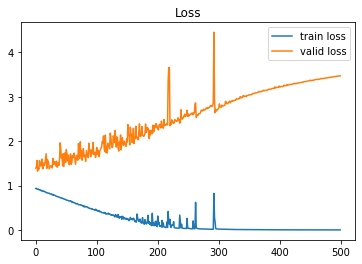

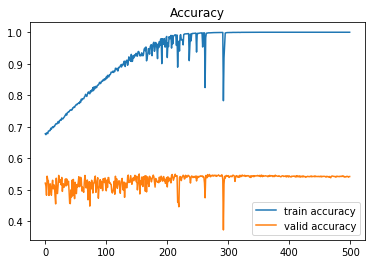

In [66]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [56]:
%matplotlib inline
plt.show()

2. 改SGD

In [63]:
model = build_mlp() #初始化

optimizer = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0741 - accuracy: 0.2623 - val_loss: 1.9554 - val_accuracy: 0.3122
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.8906 - accuracy: 0.3333 - val_loss: 1.8803 - val_accuracy: 0.3239
Epoch 3/100
196/196 [==============================] - 2s 12ms/step - loss: 1.8176 - accuracy: 0.3591 - val_loss: 1.8096 - val_accuracy: 0.3652
Epoch 4/100
196/196 [==============================] - 3s 14ms/step - loss: 1.7682 - accuracy: 0.3766 - val_loss: 1.7936 - val_accuracy: 0.3576
Epoch 5/100
196/196 [==============================] - 3s 13ms/step - loss: 1.7333 - accuracy: 0.3902 - val_loss: 1.7426 - val_accuracy: 0.3866
Epoch 6/100
196/196 [==============================] - 2s 13ms/step - loss: 1.6972 - accuracy: 0.4035 - val_loss: 1.7484 - val_accuracy: 0.3775
Epoch 7/100
196/196 [==============================] - 2s 13ms/step - loss: 1.6719 - accuracy: 0.4133 - val_loss: 1.7439 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.1819 - accuracy: 0.5857 - val_loss: 1.4293 - val_accuracy: 0.4928
Epoch 58/100
196/196 [==============================] - 3s 15ms/step - loss: 1.1798 - accuracy: 0.5878 - val_loss: 1.4070 - val_accuracy: 0.5054
Epoch 59/100
196/196 [==============================] - 3s 14ms/step - loss: 1.1723 - accuracy: 0.5909 - val_loss: 1.4275 - val_accuracy: 0.4909
Epoch 60/100
196/196 [==============================] - 3s 13ms/step - loss: 1.1608 - accuracy: 0.5933 - val_loss: 1.3442 - val_accuracy: 0.5159
Epoch 61/100
196/196 [==============================] - 3s 14ms/step - loss: 1.1620 - accuracy: 0.5929 - val_loss: 1.4121 - val_accuracy: 0.5002
Epoch 62/100
196/196 [==============================] - 3s 13ms/step - loss: 1.1516 - accuracy: 0.5968 - val_loss: 1.3856 - val_accuracy: 0.5065
Epoch 63/100
196/196 [==============================] - 3s 13ms/step - loss: 1.1479 - accuracy: 0.5981 - val_loss: 1.5258 - val_accuracy: 0.476

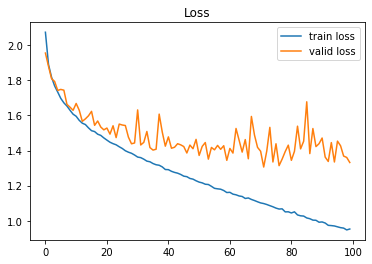

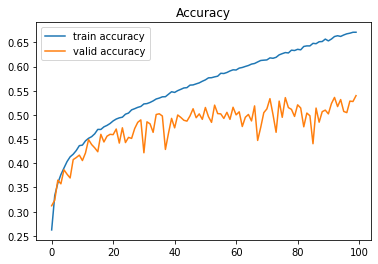

In [64]:

# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

- 在其他條件相同下,optimier使用Adam的準確度較SGD高，且在驗證資料也較穩定
- epochs變多，驗證資料的accuracy沒什麼上升